# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [4]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [5]:
pokemon = pd.DataFrame(raw_data)
pokemon

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [6]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution', 'pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [7]:
pokemon.insert(5, 'places', ['lakes', 'parks', 'hills', 'forest'])
pokemon

,name,type,hp,evolution,pokedex,places
0,Bulbasaur,grass,45,Ivysaur,yes,lakes
1,Charmander,fire,39,Charmeleon,no,parks
2,Squirtle,water,44,Wartortle,yes,hills
3,Caterpie,bug,45,Metapod,no,forest


### 6. Display the data type of each column

In [8]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
places       object
dtype: object

### 7. Display the info of dataframe

In [9]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   type       4 non-null      object
 2   hp         4 non-null      int64 
 3   evolution  4 non-null      object
 4   pokedex    4 non-null      object
 5   places     4 non-null      object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes


## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [10]:
wine = pd.read_csv('Exercise Data Files\wine.txt', header = None)

In [11]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [12]:
wine.drop(columns = [0, 3, 6, 8, 10, 12, 13], inplace = True)

In [13]:
wine.head()

,1,2,4,5,7,9,11
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05
2,13.16,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04


### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [14]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']

In [15]:
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05
2,13.16,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04


### 11. Set the values of the first 3 values from alcohol column as NaN

In [16]:
wine.loc[0:2, 'alcohol'] = np.nan

In [17]:
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127,3.06,2.29,1.04
1,NaN,1.78,11.2,100,2.76,1.28,1.05
2,NaN,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04


### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [18]:
wine.loc[2:3, 'magnesium'] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,NaN,2.36,18.6,NaN,3.24,2.81,1.03
3,14.37,1.95,16.8,NaN,3.49,2.18,0.86
4,13.24,2.59,21.0,118.0,2.69,1.82,1.04


### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [19]:
wine = wine.fillna(value = {'alcohol': 10, 'magnesium': 100})
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
4,13.24,2.59,21.0,118.0,2.69,1.82,1.04


### 14. Count the number of missing values in all columns.

In [20]:
wine.isna().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [21]:
random_arr = np.random.randint(10, size = 10)
random_arr

array([6, 9, 9, 0, 4, 5, 7, 3, 7, 9])

### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [22]:
wine.loc[random_arr, 'alcohol'] = np.nan
wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
3,NaN,1.95,16.8,100.0,3.49,2.18,0.86
4,NaN,2.59,21.0,118.0,2.69,1.82,1.04
5,NaN,1.76,15.2,112.0,3.39,1.97,1.05
6,NaN,1.87,14.6,96.0,2.52,1.98,1.02
7,NaN,2.15,17.6,121.0,2.51,1.25,1.06
8,14.83,1.64,14.0,97.0,2.98,1.98,1.08
9,NaN,1.35,16.0,98.0,3.15,1.85,1.01


### 17.  How many missing values do we have now?

In [23]:
wine.isna().sum()

alcohol              7
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 18. Print only the non-null values in alcohol

In [24]:
wine.loc[wine['alcohol'].notnull()]

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
8,14.83,1.64,14.0,97.0,2.98,1.98,1.08
10,14.10,2.16,18.0,105.0,3.32,2.38,1.25
11,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### 19. Delete the rows that contain missing values

In [25]:
wine.dropna(inplace= True)

In [26]:
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
8,14.83,1.64,14.0,97.0,2.98,1.98,1.08
10,14.10,2.16,18.0,105.0,3.32,2.38,1.25
11,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### 20.  Reset the index, so it starts with 0 again

In [27]:
wine.reset_index(drop = True, inplace = True)

In [28]:
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,1.05
1,10.00,2.36,18.6,100.0,3.24,2.81,1.03
2,14.83,1.64,14.0,97.0,2.98,1.98,1.08
3,14.10,2.16,18.0,105.0,3.32,2.38,1.25
4,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
166,13.71,5.65,20.5,95.0,0.61,1.06,0.64
167,13.40,3.91,23.0,102.0,0.75,1.41,0.70
168,13.27,4.28,20.0,120.0,0.69,1.35,0.59
169,13.17,2.59,20.0,120.0,0.68,1.46,0.60


## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [29]:
chipo = pd.read_csv('Exercise Data Files\chipotle.tsv', sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [30]:
chipo['item_price'] = chipo['item_price'].str.replace('$','', regex = False)
chipo['item_price'] = pd.to_numeric(chipo['item_price'])

In [31]:
chipo[chipo['item_price']>10]['item_name'].count()

1130

### 22. Print the Chipo Dataframe & info about data frame

In [32]:
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                          [Clementine]

In [33]:
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB
None


### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

In [34]:
chipo_ = chipo.copy()
chipo_.drop_duplicates(subset = ['item_name', 'quantity'], inplace = True, ignore_index = True)

In [35]:
chipo_ = chipo[['item_name', 'item_price']]
chipo_

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75
4619,Chicken Salad Bowl,11.25
4620,Chicken Salad Bowl,8.75


In [36]:
chipo_.sort_values(by = 'item_price', ascending = False)

,item_name,item_price
3598,Chips and Fresh Tomato Salsa,44.25
3480,Carnitas Bowl,35.25
1254,Chicken Burrito,35.00
3602,Chicken Burrito,35.00
3601,Veggie Burrito,33.75
...,...,...
3936,Canned Soda,1.09
2922,Bottled Water,1.09
1396,Canned Soda,1.09
2562,Canned Soda,1.09


### 24. Sort by the name of the item

In [37]:
chipo.sort_values(by = 'item_name', inplace = True)
chipo

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


### 25. What was the quantity of the most expensive item ordered?

In [38]:
chipo[chipo['item_price'] == chipo['item_price'].max()]['quantity'].sum()

15

### 26. How many times were a Veggie Salad Bowl ordered?

In [39]:
chipo[chipo['item_name'] == 'Veggie Salad Bowl']['item_name'].count()

18

### 27. How many times people orderd more than one Canned Soda?

In [40]:
chipo[(chipo['item_name'] == 'Canned Soda') & (chipo['quantity'] > 1)]['item_name'].count()

20

## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [41]:
users = pd.read_csv('Exercise Data Files\occupation.csv', sep = '|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### 29. Discover what is the mean age per occupation

In [42]:
users.groupby('occupation').age.mean().reset_index()

,occupation,age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [43]:
users['is_male'] = np.where(users.gender == 'M', 1, 0)
users

,user_id,age,gender,occupation,zip_code,is_male
0,1,24,M,technician,85711,1
1,2,53,F,other,94043,0
2,3,23,M,writer,32067,1
3,4,24,M,technician,43537,1
4,5,33,F,other,15213,0
...,...,...,...,...,...,...
938,939,26,F,student,33319,0
939,940,32,M,administrator,02215,1
940,941,20,M,student,97229,1
941,942,48,F,librarian,78209,0


In [44]:
(users.groupby('occupation').is_male.sum()/users.groupby('occupation').gender.count()).round(2).sort_values(ascending = False)

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
executive        0.91
programmer       0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

### 31. For each occupation, calculate the minimum and maximum ages

In [45]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


### 32. For each combination of occupation and gender, calculate the mean age

In [46]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### 33.  For each occupation present the percentage of women and men

In [47]:
(users.groupby('occupation').gender.value_counts(normalize = True)*100).round(2)

occupation     gender
administrator  M          54.43
               F          45.57
artist         M          53.57
               F          46.43
doctor         M         100.00
educator       M          72.63
               F          27.37
engineer       M          97.01
               F           2.99
entertainment  M          88.89
               F          11.11
executive      M          90.62
               F           9.38
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         M          83.33
               F          16.67
librarian      F          56.86
               M          43.14
marketing      M          61.54
               F          38.46
none           M          55.56
               F          44.44
other          M          65.71
               F          34.29
programmer     M          90.91
               F           9.09
retired        M          92.86
               F  

## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [48]:
df = pd.concat((pd.read_csv('Exercise Data Files\student-mat.csv'), pd.read_csv('Exercise Data Files\student-por.csv')))
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [49]:
df = df.loc[:, 'school':'guardian']
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother


### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [50]:
Cap = lambda x: x.capitalize()
print(Cap('at_home'))

At_home


### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [51]:
df['Mjob'].apply(Cap)
df['Fjob'].apply(Cap)

0       Teacher
1         Other
2         Other
3      Services
4         Other
         ...   
644       Other
645    Services
646       Other
647    Services
648       Other
Name: Fjob, Length: 1044, dtype: object

### 38. Print the last elements of the data set. (Last few records)

In [52]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother


### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [53]:
df['Mjob'] = df['Mjob'].apply(Cap)
df['Fjob'] = df['Fjob'].apply(Cap)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,Services,Other,course,mother
645,MS,F,18,U,LE3,T,3,1,Teacher,Services,course,mother
646,MS,F,18,U,GT3,T,1,1,Other,Other,course,mother
647,MS,M,17,U,LE3,T,3,1,Services,Services,course,mother


### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

In [54]:
def majority(n):
    return n >= 18

df['legal_drinker'] = majority(df['age'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,Services,Other,course,mother,True
645,MS,F,18,U,LE3,T,3,1,Teacher,Services,course,mother,True
646,MS,F,18,U,GT3,T,1,1,Other,Other,course,mother,True
647,MS,M,17,U,LE3,T,3,1,Services,Services,course,mother,False


### 41. Multiply every number of the dataset by 10. 

In [55]:
df[df.select_dtypes(include = 'number').columns] *= 10
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,course,mother,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,course,father,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,other,mother,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,home,mother,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,home,father,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,190,R,GT3,T,20,30,Services,Other,course,mother,True
645,MS,F,180,U,LE3,T,30,10,Teacher,Services,course,mother,True
646,MS,F,180,U,GT3,T,10,10,Other,Other,course,mother,True
647,MS,M,170,U,LE3,T,30,10,Services,Services,course,mother,False


## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [56]:
cars1 = pd.read_csv('Exercise Data Files\cars1.csv')
cars1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN


In [57]:
cars2 = pd.read_csv('Exercise Data Files\cars2.csv')
cars2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21.0,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [58]:
type(cars1)

pandas.core.frame.DataFrame

In [59]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [60]:
cars1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN,NaN,NaN,NaN


In [61]:
cars1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [62]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           198 non-null    float64
 1   cylinders     198 non-null    int64  
 2   displacement  198 non-null    int64  
 3   horsepower    198 non-null    object 
 4   weight        198 non-null    int64  
 5   acceleration  198 non-null    float64
 6   model         198 non-null    int64  
 7   origin        198 non-null    int64  
 8   car           198 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 21.8+ KB


In [63]:
cars1.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
car              object
Unnamed: 9      float64
Unnamed: 10     float64
Unnamed: 11     float64
Unnamed: 12     float64
Unnamed: 13     float64
dtype: object

In [64]:
cars1.index

RangeIndex(start=0, stop=198, step=1)

In [65]:
cars1.shape

(198, 14)

In [66]:
cars1.count()

mpg             198
cylinders       198
displacement    198
horsepower      198
weight          198
acceleration    198
model           198
origin          198
car             198
Unnamed: 9        0
Unnamed: 10       0
Unnamed: 11       0
Unnamed: 12       0
Unnamed: 13       0
dtype: int64

In [67]:
cars1.size

2772

In [68]:
cars1.ndim

2

In [69]:
cars1.axes

[RangeIndex(start=0, stop=198, step=1),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
        'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
       dtype='object')]

In [70]:
cars1.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,0.0,0.0,0.0,0.0,0.0
mean,19.719697,5.898990,223.469697,3177.888889,15.005556,72.818182,1.439394,NaN,NaN,NaN,NaN,NaN
std,5.814254,1.785417,115.181017,934.783733,2.872382,1.865332,0.708085,NaN,NaN,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,15.000000,4.000000,113.250000,2302.500000,13.000000,71.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,19.000000,6.000000,228.000000,3030.000000,15.000000,73.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,24.375000,8.000000,318.000000,4080.750000,16.800000,74.000000,2.000000,NaN,NaN,NaN,NaN,NaN
max,35.000000,8.000000,455.000000,5140.000000,23.500000,76.000000,3.000000,NaN,NaN,NaN,NaN,NaN


In [71]:
cars1.memory_usage()

Index            128
mpg             1584
cylinders       1584
displacement    1584
horsepower      1584
weight          1584
acceleration    1584
model           1584
origin          1584
car             1584
Unnamed: 9      1584
Unnamed: 10     1584
Unnamed: 11     1584
Unnamed: 12     1584
Unnamed: 13     1584
dtype: int64

In [72]:
cars1.sort_values(by = 'mpg', ignore_index = True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,9.0,8,304,193,4732,18.5,70,1,hi 1200d,NaN,NaN,NaN,NaN,NaN
1,10.0,8,307,200,4376,15.0,70,1,chevy c20,NaN,NaN,NaN,NaN,NaN
2,10.0,8,360,215,4615,14.0,70,1,ford f250,NaN,NaN,NaN,NaN,NaN
3,11.0,8,400,150,4997,14.0,73,1,chevrolet impala,NaN,NaN,NaN,NaN,NaN
4,11.0,8,429,208,4633,11.0,72,1,mercury marquis,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,31.0,4,76,52,1649,16.5,74,3,toyota corona,NaN,NaN,NaN,NaN,NaN
194,32.0,4,83,61,2003,19.0,74,3,datsun 710,NaN,NaN,NaN,NaN,NaN
195,32.0,4,71,65,1836,21.0,74,3,toyota corolla 1200,NaN,NaN,NaN,NaN,NaN
196,33.0,4,91,53,1795,17.5,75,3,honda civic cvcc,NaN,NaN,NaN,NaN,NaN


In [73]:
cars1.value_counts()

Series([], dtype: int64)

In [74]:
#from pandas_profiling import ProfileReport
#ProfileReport(cars1)

### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [75]:
cars1 = cars1.loc[:, ~cars1.columns.str.contains('Unnamed')]
cars1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick
194,22.5,6,232,90,3085,17.6,76,1,amc hornet
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody


### 45. What is the number of observations in each dataset?

In [76]:
len(cars1)

198

In [77]:
len(cars2)

200

### 46. Join cars1 and cars2 into a single DataFrame called cars

In [78]:
cars = cars1.merge(cars2, how = 'outer')
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97,52,2130,24.6,82,2,vw pickup
395,32.0,4,135,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120,79,2625,18.6,82,1,ford ranger


### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [79]:
pd.Series(np.random.randint(15000, 73000, size = len(cars)))

0      64465
1      49065
2      61308
3      45627
4      32399
       ...  
393    26210
394    42864
395    37099
396    60097
397    28765
Length: 398, dtype: int32

### 48. Add the column owners to cars

In [80]:
cars['owners'] = pd.Series(np.random.randint(15000, 73000, size = len(cars)))
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,58340
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,56736
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,28344
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,70338
4,17.0,8,302,140,3449,10.5,70,1,ford torino,51018
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,38645
394,44.0,4,97,52,2130,24.6,82,2,vw pickup,34306
395,32.0,4,135,84,2295,11.6,82,1,dodge rampage,65185
396,28.0,4,120,79,2625,18.6,82,1,ford ranger,41838


## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [81]:
# (a) Current date and time

print(dt.datetime.now())

2022-12-15 18:34:50.202974


In [82]:
# (b) Current year

print(dt.date.today().year)

2022


In [83]:
# (c) Month of year

print(dt.date.today().month)

12


In [84]:
# (d) Week number of the year

print(dt.date.today().strftime('%V'))

50


In [85]:
# (e) Weekday of the week

dt.date.today().strftime('%A')

'Thursday'

In [86]:
# (f) Day of year

print(dt.date.today().strftime('%j'))

349


In [87]:
# (g) Day of the month

print(dt.date.today().strftime('%d'))

15


In [88]:
# (h) Day of week

dt.datetime.today().weekday()

3

### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [89]:
def func1(s):
    output = pd.to_datetime(s, format = '%b %d %Y %I:%M%p')
    return output

func1('Jul 1 2014 2:43PM')

Timestamp('2014-07-01 14:43:00')

### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [90]:
def func2():
    output = dt.date.today() + pd.DateOffset(days = -5)
    return output.strftime("%Y-%m-%d")

func2()

'2022-12-10'

### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [91]:
def func3(ts):
    return dt.datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
   
func3(1284105682)

'2010-09-10 08:01:22'

### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [92]:
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])
DoB = pd.to_datetime(DoB, format = '%d%b%y') + pd.DateOffset(days = -100*365.25)
DoB

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
dtype: datetime64[ns]

### 54. Write a Python program to get days between two dates. 

In [93]:
def func4(date1, date2):
    return (dt.datetime.strptime(date1, '%d-%m-%Y')- dt.datetime.strptime(date2, '%d-%m-%Y')).days

func4('21-07-2020', '21-07-2019')

366

### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [94]:
Date = "15Dec1998"
Date = dt.datetime.strptime(Date, '%d%b%Y')
Date.strftime('%A, %d %b %y')

'Tuesday, 15 Dec 98'

## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [95]:
data = pd.read_csv('Exercise Data Files\wind.data',
                  parse_dates = {'dates' : ['Yr', 'Mo', 'Dy']},
                  keep_date_col=True)
data

,dates,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [96]:
data.loc[data['Yr'].astype(int) < 70, 'dates'] = data['dates'] + pd.DateOffset(days = -100 *365.25)
data

,dates,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [97]:
data.drop(columns = ['Yr', 'Mo', 'Dy'], inplace = True)

### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [98]:
data = data.set_index('dates')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dates,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [99]:
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='dates', length=6574, freq=None)

### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [100]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### 60. Compute how many non-missing values there are in total.

In [101]:
data.notna().sum().sum()

78857

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [102]:
data.mean().mean()

10.227982360836924

### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [103]:
loc_stats = pd.DataFrame(columns = data.columns)

In [104]:
loc_stats.loc['min', :] = data.min()
loc_stats.loc['max', :] = data.max()
loc_stats.loc['mean', :] = data.mean()
loc_stats.loc['std', :] = data.std()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.67,0.21,1.5,0.0,0.13,0.0,0.0,0.0,0.0,0.04,0.13,0.67
max,35.8,33.37,33.84,28.46,37.54,26.16,30.37,31.08,25.88,28.21,42.38,42.54
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.49359,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.00845,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [105]:
day_stats = pd.DataFrame(index = data.index)

In [106]:
day_stats['min'] = data.min(axis = 1)
day_stats['max'] = data.max(axis = 1)
day_stats['mean'] = data.mean(axis = 1)
day_stats['std'] = data.std(axis = 1)

In [107]:
day_stats

,min,max,mean,std
dates,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [108]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [109]:
data_ = data.copy()
data_['year_month'] = data_.index.strftime('%Y-%m')
data_.groupby('year_month').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
year_month,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
2071-08,9.783226,6.991935,10.227097,4.540968,8.978065,4.797742,7.450645,5.460645,6.866452,5.244194,10.087742,11.500968
2071-09,8.365000,6.512667,7.704333,3.470667,7.676667,5.462667,6.003000,4.437333,5.385667,4.748667,9.232333,12.311333
2071-10,12.926129,11.106452,12.467419,5.778065,11.305161,8.562903,10.073226,8.091935,9.121935,9.571290,15.617097,17.890645


In [110]:
data_ = data.copy()
data_["yearmonth"] = data_.index.strftime("%Y-%m")
data_.groupby(["yearmonth"]).apply(lambda x: pd.Series({"mean_windspeed": x.mean(numeric_only=True).mean()}))

,mean_windspeed
yearmonth,
1961-01,11.322206
1961-02,13.497834
1961-03,11.062533
1961-04,8.411167
1961-05,8.977606
...,...
2071-08,7.660806
2071-09,6.775861
2071-10,11.042688


### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [111]:
weekly = data.resample('W').agg(['min', 'max', 'mean', 'std'])
weekly.loc[weekly.index[1:53],:]

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
dates                                                                    
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

## The below exercises (67-70) required to use appl_1980_2014.csv  file

### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [112]:
apple = pd.read_csv('Exercise Data Files/appl_1980_2014.csv')
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 68.  Check out the type of the columns

In [113]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 69. Transform the Date column as a datetime type

In [114]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### 70.  Set the date as the index

In [115]:
apple = apple.set_index('Date')
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### 71.  Is there any duplicate dates?

In [116]:
apple.index.duplicated().any()

False

### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [117]:
apple = apple.sort_values(by = 'Date', axis = 0)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### 73. Get the last business day of each month

In [118]:
apple['year_month'] = apple.index.strftime('%Y-%m')
apple.reset_index().groupby('year_month').agg(last_business_day = ('Date', 'max'))

,last_business_day
year_month,
1980-12,1980-12-31
1981-01,1981-01-30
1981-02,1981-02-27
1981-03,1981-03-31
1981-04,1981-04-30
...,...
2014-03,2014-03-31
2014-04,2014-04-30
2014-05,2014-05-30


### 74.  What is the difference in days between the first day and the oldest

In [119]:
(apple.index.max() - apple.index.min()).days

12261

### 75.  How many months in the data we have?

In [120]:
len(apple['year_month'].unique())

404

## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

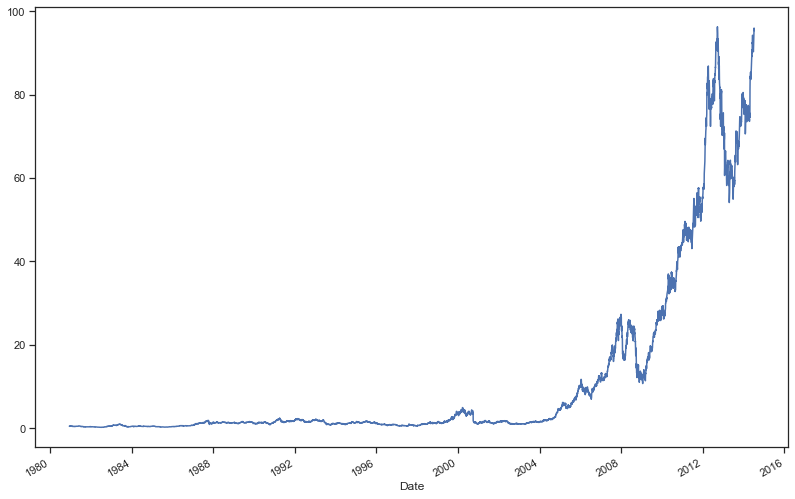

In [121]:
apple['Adj Close'].plot(figsize = (13.5, 9))
plt.show()

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [122]:
online_rt = pd.read_csv('Exercise Data Files\Online_Retail.csv', encoding = 'unicode_escape')
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

<AxesSubplot:title={'center':'Countries with top 10 Quantity Except UK'}, xlabel='Country'>

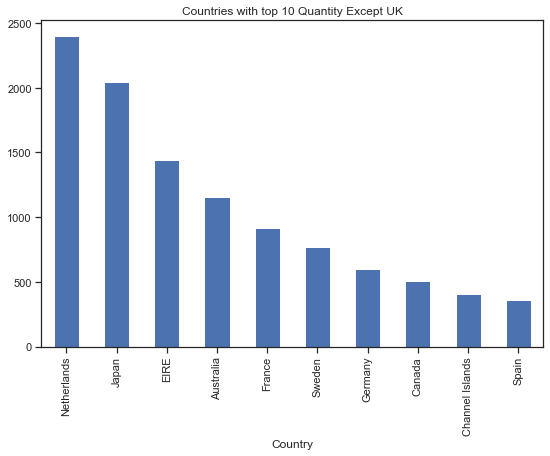

In [123]:
online_rt[online_rt['Country'] != 'United Kingdom'].groupby('Country').Quantity.max().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (9,6), title = "Countries with top 10 Quantity Except UK")

### 79.  Exclude negative Quatity entries

In [124]:
online_rt = online_rt[online_rt['Quantity'] >= 0].reset_index(drop = True)
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
531280,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
531281,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
531282,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
531283,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


In [125]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

In [132]:
online_rt.groupby('Country').Revenue.max().sort_values(ascending = False).head(3)

Country
United Kingdom    168469.60
Netherlands         4992.00
France              4161.06
Name: Revenue, dtype: float64

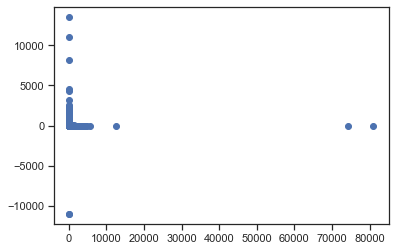

In [139]:
plt.scatter(x = online_rt.loc[online_rt['Country'] == 'United Kingdom', 'Quantity'], 
             y = online_rt.loc[online_rt['Country'] == 'United Kingdom', 'UnitPrice'])
plt.show()

In [135]:
online_rt.loc[online_rt['Country'] == 'United Kingdom', 'Quantity']

0          6
1          6
2          8
3          6
4          6
          ..
531265    12
531266     8
531267    24
531268    24
531269    10
Name: Quantity, Length: 486286, dtype: int64

## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

### 85. Create Bar Chart for soap of all months and Save the chart in folder

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

### 87. Create Histogram for Total Revenue

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

### 90. Create Box Plot for Total Profit variable